In [ ]:
import numpy as ny
import pandas as pd
from matplotlib import pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/DSML-dataset/diamonds.csv')
data


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
data.isna().sum()

,0
Unnamed: 0,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0


In [ ]:
data.dtypes

,0
Unnamed: 0,int64
carat,float64
cut,object
color,object
clarity,object
depth,float64
table,float64
price,int64
x,float64
y,float64


In [ ]:
label_encoder=preprocessing.LabelEncoder()
data['cut']=label_encoder.fit_transform(data['cut'])
data['color']=label_encoder.fit_transform(data['color'])
data['clarity']=label_encoder.fit_transform(data['clarity'])
data['clarity'].unique()

array([3, 2, 4, 5, 7, 6, 0, 1])

In [ ]:
x=data.drop(['price'],axis=1)
y=data.price


,price
0,326
1,326
2,327
3,334
4,335
...,...
53935,2757
53936,2757
53937,2757
53938,2757


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=5)

In [ ]:
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.transform(x_test)

In [ ]:
x_train

array([[-0.7318613 ,  0.4883012 , -0.53775988, ...,  0.72045688,
         0.64776589,  0.69186401],
       [ 1.02362027, -0.8166891 ,  0.43496875, ..., -0.83640557,
        -0.85452434, -0.84244131],
       [-1.4627222 ,  0.00419189, -0.53775988, ...,  0.13329733,
         0.16147541,  0.23300635],
       ...,
       [-0.41680621,  1.68805034,  0.43496875, ...,  1.62788529,
         1.6290306 ,  1.48052563],
       [-0.53422004,  1.39337511,  0.43496875, ...,  1.39658001,
         1.32509905,  1.3371326 ],
       [ 0.56239299, -0.8166891 , -1.5104885 , ..., -0.97874728,
        -0.93267817, -0.87111991]])

In [ ]:
model=KNeighborsRegressor()
model.fit(x_train,y_train)

pred_y=model.predict(x_test)
pred_y

array([4332. ,  973.4, 3992.2, ..., 5749.8,  801.4, 5369.4])

In [ ]:
model.score(x_test,y_test)

0.9694454987357078

In [ ]:
#K-NN classifier

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
ship=pd.read_csv("/content/drive/MyDrive/DSML-dataset/titanic.csv")
ship

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C,1


In [ ]:
ship.dtypes

,0
PassengerId,int64
Name,object
Pclass,int64
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Cabin,object


In [ ]:
ship.isna().sum()

,0
PassengerId,0
Name,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [ ]:
x=ship['Age'].mean()
x
ship['Age'].fillna(x,inplace=True)
ship.fillna('S',inplace=True)

/tmp/ipython-input-4213073693.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ship['Age'].fillna(x,inplace=True)


In [ ]:
ship.isna().sum()
ship.dtypes

,0
PassengerId,int64
Name,object
Pclass,int64
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Cabin,object


In [ ]:
label_encoder=preprocessing.LabelEncoder()
ship['Sex']=label_encoder.fit_transform(ship['Sex'])
ship['Ticket']=label_encoder.fit_transform(ship['Ticket'])
ship['Embarked']=label_encoder.fit_transform(ship['Embarked'])


In [ ]:
x=ship.drop(['PassengerId','Name','Cabin','Survived'],axis=1)
y=ship.Survived

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)
model=KNeighborsClassifier()
model.fit(x_train,y_train)

pred_y=model.predict(x_test)
pred_y

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0])

In [ ]:
model.score(x_test,y_test)

0.6927374301675978

<Axes: >

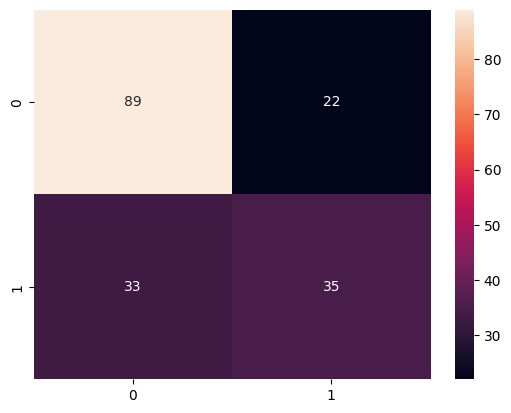

In [ ]:
cm=confusion_matrix(y_test,pred_y)
cm
sn.heatmap(cm,annot=True)

In [ ]:
classification_report(y_test,pred_y)

'              precision    recall  f1-score   support\n\n           0       0.73      0.80      0.76       111\n           1       0.61      0.51      0.56        68\n\n    accuracy                           0.69       179\n   macro avg       0.67      0.66      0.66       179\nweighted avg       0.69      0.69      0.69       179\n'

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris=load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
data=pd.DataFrame(iris.data,columns=iris.feature_names)
data['targets']=iris.target
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),targets
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
data.isna().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
targets,0


In [ ]:
data.dtypes

,0
sepal length (cm),float64
sepal width (cm),float64
petal length (cm),float64
petal width (cm),float64
targets,int64


In [ ]:
x=data.drop(['targets'],axis=1)
y=data.targets
y

,targets
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)

In [ ]:
model=KNeighborsClassifier()
model.fit(x_train,y_train)

pred_y=model.predict(x_test)
pred_y

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0])

In [ ]:
model.score(x_test,y_test)

0.6927374301675978

<Axes: >

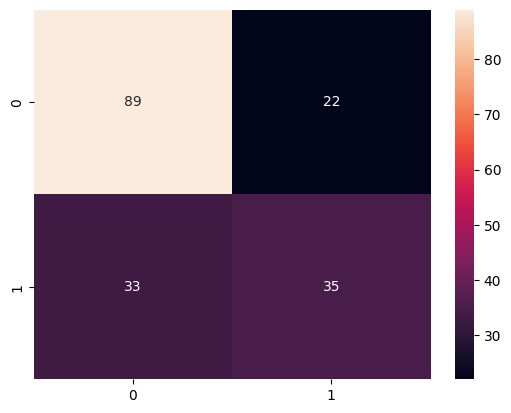

In [ ]:
cm=confusion_matrix(y_test,pred_y)
cm
sn.heatmap(cm,annot=True)

In [ ]:
classification_report(y_test,pred_y)

'              precision    recall  f1-score   support\n\n           0       0.73      0.80      0.76       111\n           1       0.61      0.51      0.56        68\n\n    accuracy                           0.69       179\n   macro avg       0.67      0.66      0.66       179\nweighted avg       0.69      0.69      0.69       179\n'

In [ ]:
ibm=pd.read_csv('/content/drive/MyDrive/DSML-dataset/IBM_2006-01-01_to_2018-01-01.csv')
ibm

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
1,2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2,2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
3,2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
4,2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM
...,...,...,...,...,...,...,...
3015,2017-12-22,151.82,153.00,151.50,152.50,2990583,IBM
3016,2017-12-26,152.51,153.86,152.50,152.83,2479017,IBM
3017,2017-12-27,152.95,153.18,152.61,153.13,2149257,IBM
3018,2017-12-28,153.20,154.12,153.20,154.04,2687624,IBM


In [ ]:
ibm.isna().sum()

,0
Date,0
Open,1
High,0
Low,1
Close,0
Volume,0
Name,0


In [ ]:
x=ibm['Low'].mean()
y=ibm['Open'].mean()
ibm['Low'].fillna(x,inplace=True)
ibm['Open'].fillna(y,inplace=True)

/tmp/ipython-input-3823584590.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ibm['Low'].fillna(x,inplace=True)
/tmp/ipython-input-3823584590.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method(

In [ ]:
ibm.dtypes

,0
Date,int64
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64
Name,object


In [ ]:
label_encoder=preprocessing.LabelEncoder()
ibm['Date']=label_encoder.fit_transform(ibm['Date'])
ibm.Date.unique()

array([   0,    1,    2, ..., 3017, 3018, 3019])

In [ ]:
x=ibm.drop(['Name','Volume'],axis=1)
y=ibm.Volume


,Volume
0,11715200
1,9840600
2,7213500
3,8197400
4,6858200
...,...
3015,2990583
3016,2479017
3017,2149257
3018,2687624


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)

In [ ]:
model=KNeighborsRegressor()
model.fit(x_train,y_train)

pred_y=model.predict(x_test)
pred_y

array([ 8654959.8,  3202640.2,  3837694.6,  6450147. ,  4980400. ,
        5059256.2,  3432460. ,  5124059. ,  3975601.6,  7347652.4,
        3721223.6,  5621499. ,  4973251.6,  4127180. ,  4928362.4,
        4049086.2,  3741535.6,  4449836.8,  4944980. ,  2578350. ,
        3432460. ,  6423210.2,  7053048. ,  3408087. ,  7865480.6,
        5545842.2,  4282301.2,  4144021.2,  2229270.4,  4370010.4,
        3467751.2,  9371256.6,  5293954. ,  2721116. ,  4141498.8,
        3490659.8,  4457865.4,  6816069.6,  5631318.8,  4107740. ,
        2784590.6,  4829018.6, 10314079.2,  2957701.8,  3070767.2,
        8654959.8,  4944992.4,  5071800. ,  5138789.6,  5268843.2,
        4294881.6,  6115407. ,  6405702.4,  4103514.2,  4108911.8,
        2703621. ,  3819689.6,  5758966.8,  6048601.2,  6740931.2,
        3837694.6,  3377432.2,  4721723.4,  4999333.4,  4151097.6,
        3467526.6,  5008252.4,  9034994.2,  5090524.4,  5919561.8,
        5525383. ,  2646604. ,  6549392. ,  3289698.8,  334194

In [ ]:
model.score(x_test,y_test)

0.5026331335624931